In [300]:
import os
import sys
import inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

import tf_som

from imp import reload

reload(tf_som)

<module 'tf_som' from '/Users/jodier/PycharmProjects/tf2-som/tf_som/__init__.py'>

In [301]:
tf_som.setup_tensorflow_for_cpus()

In [302]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [303]:
df = pd.read_csv('colors.csv')

colors = np.float32(tf_som.normalize(df[['R', 'G', 'B']]).values)

(16, 3)


  0%|          | 0/25 [00:00<?, ?it/s]2023-04-12 19:06:50.181814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [16,3]
	 [[{{node Placeholder/_0}}]]
2023-04-12 19:06:50.212428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [16,3]
	 [[{{node Placeholder/_0}}]]
2023-04-12 19:06:50.220710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_

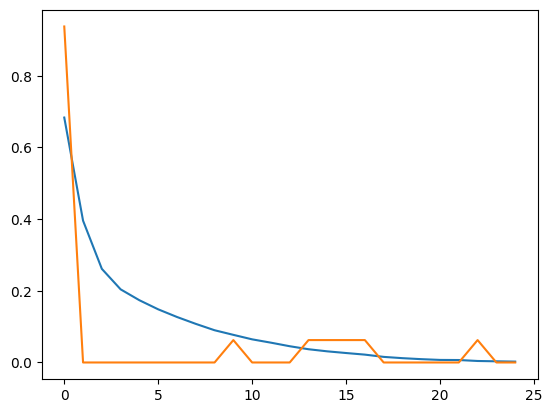

In [304]:
m = 24
n = 32

som = tf_som.SOM(m, n, 3, seed = 1357, dtype = np.float32, learning_rate = 0.3, sigma = 7.0, epochs = 25)

som.train(colors)

plt.plot(som.get_quantization_errors())
plt.plot(som.get_topographic_errors())

som.save('foo.fits', file_format = 'fits')
som.load('foo.fits', file_format = 'fits')
som.save('foo.h5', file_format = 'hdf5')
som.load('foo.h5', file_format = 'hdf5')

In [305]:
image_grid = som.get_centroids()

activation_map = som.activation_map(colors)

distance_map = som.distance_map()

2023-04-12 19:06:50.600922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [16,3]
	 [[{{node Placeholder/_0}}]]


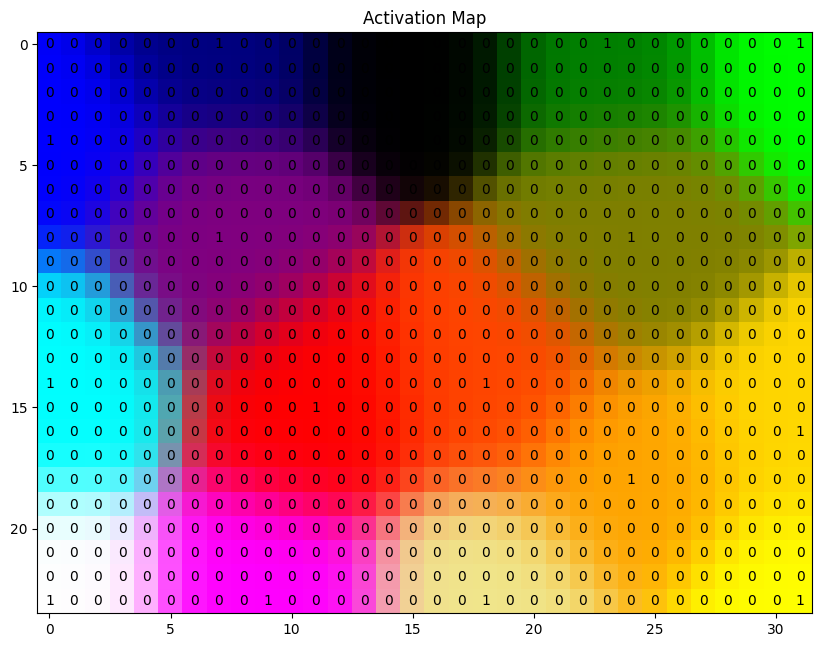

In [306]:
plt.figure(figsize = (2 * 5, 2 * 4))

plt.imshow(image_grid)
plt.title('Activation Map')

for i in range(m):
    for j in range(n):

        plt.text(j, i, '{}'.format(activation_map[i, j]), ha = 'center', va = 'center',
             bbox = dict(
                 facecolor = 'white',
                 alpha = 0.0,
                 lw = 0
             )
        )

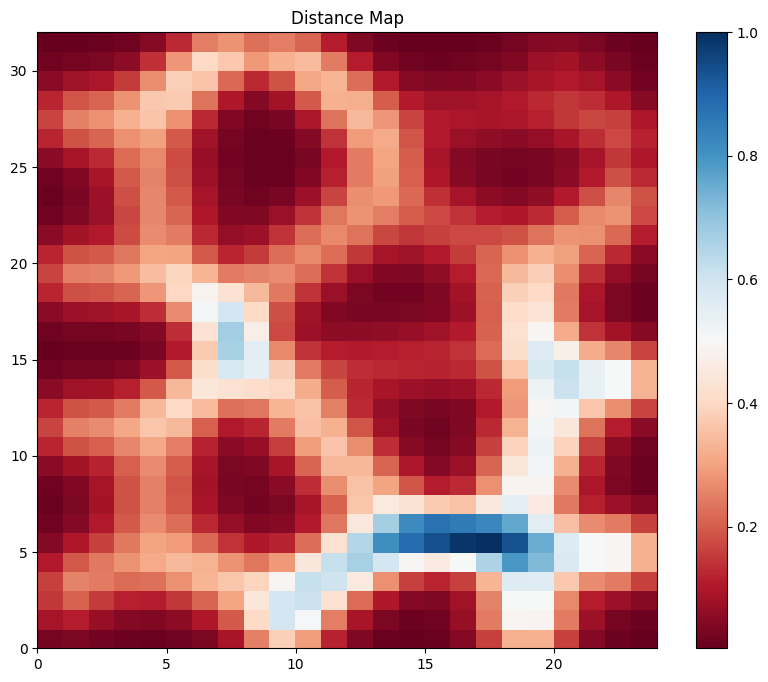

In [307]:
plt.figure(figsize = (2 * 5, 2 * 4))

plt.pcolor(distance_map.T, cmap = 'RdBu')
plt.title('Distance Map')
plt.colorbar()

In [308]:
som.winners(colors, centroids = False)

2023-04-12 19:06:52.933288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [16,3]
	 [[{{node Placeholder/_0}}]]


array([ 15, 736, 491,  31, 128, 767, 448, 745, 280,  23, 263,   7, 466,
       600, 543, 754])

In [309]:
som.winners(colors, centroids = True)


2023-04-12 19:06:52.946278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [16,3]
	 [[{{node Placeholder/_0}}]]


array([[ 0, 15],
       [23,  0],
       [15, 11],
       [ 0, 31],
       [ 4,  0],
       [23, 31],
       [14,  0],
       [23,  9],
       [ 8, 24],
       [ 0, 23],
       [ 8,  7],
       [ 0,  7],
       [14, 18],
       [18, 24],
       [16, 31],
       [23, 18]])